In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
os.listdir("Datasources/inside_airbnb") 

['neighbourhoods.geo.json',
 'reviews.csv',
 '.DS_Store',
 'neighbourhoods.geojson',
 'listings_summ.csv',
 'neighbourhoods.csv',
 'stations.geojson',
 'listings.csv',
 'calendar.csv',
 'reviews_summ.csv',
 'neighbourhoods.json']

In [3]:
listings = pd.read_csv('inside_airbnb/listings.csv')
#list_summ = pd.read_csv('inside_airbnb/listings_summ.csv')
#neighborhoods = pd.read_csv('inside_airbnb/neighbourhoods.csv')
#reviews = pd.read_csv('inside_airbnb/reviews.csv')
#reviews_summ = pd.read_csv('inside_airbnb/reviews_summ.csv')
calendar = pd.read_csv('inside_airbnb/calendar.csv')

Listings Analysis

In [4]:
#listings.columns

In [5]:
#list_summ.info

In [6]:
listings = listings.loc[listings.room_type == 'Entire home/apt']

In [7]:
#Finding Most Active Listings
#l_summ = list_summ.copy()

In [8]:
#tier1 = l_summ.loc[(l_summ.availability_365>0)&(l_summ.availability_365<73)]
#tier2 = l_summ.loc[(l_summ.availability_365>72)&(l_summ.availability_365<146)]
#tier3 = l_summ.loc[(l_summ.availability_365>145)&(l_summ.availability_365<219)]
#tier4 = l_summ.loc[(l_summ.availability_365>218)&(l_summ.availability_365<292)]
#tier5 = l_summ.loc[(l_summ.availability_365>291)&(l_summ.availability_365<365)]

In [9]:
#avail_lt250 = l_summ.loc[l_summ['availability_365']<250][['id','availability_365']]

Calendar Analysis

In [6]:
cal = calendar.copy()

In [7]:
cal.columns

Index([u'listing_id', u'date', u'available', u'price'], dtype='object')

In [8]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [9]:
cal['price'] = cal['price'].astype(str).map(lambda x: x.lstrip('$'))

In [10]:
#Transform Price from Object to Numeric Data Type
cal['price'] = cal['price'].apply(pd.to_numeric, errors='coerce')

In [11]:
#cal.head(3)

In [12]:
cal['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [13]:
#cal.head(3)

New DF Joining Listings with Respective Calendar Entries

In [14]:
#Just using the calendar listingid, date and price to merge with listings
c = cal.loc[cal.available!='f']
c = c[['listing_id','date','price']]

In [15]:
#c.head(3)

In [16]:
master = listings.merge(c, how='inner', left_on='id', right_on='listing_id')

Segmentation

In [24]:
#We have too much data to plot everything in one graph. 
#Here, I create different segments from the listings master file based on apt. size and other features
#I will then plot segments individually

In [17]:
master.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

Bedroom-Bathroom Based Segmentation

In [22]:
#Here I create segments based on number of bedrooms and bathrooms

In [23]:
#Grouping by bedrooms and bathrooms to see what combos are on the market
bedbath_grouped = master[['bedrooms','bathrooms','id']].groupby(by=['bedrooms','bathrooms']).count()
bedbath_grouped = bedbath_grouped.reset_index()

In [61]:
bedbath_grouped.count()

bedrooms     82
bathrooms    82
id           82
dtype: int64

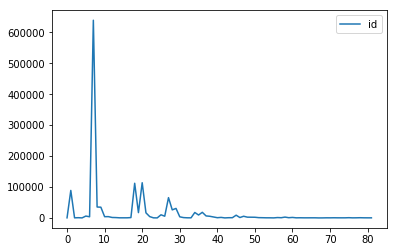

In [60]:
#Will need to fix this - needs to have the count as Y axis and row ID as X axis
plt.figure()
bedbath_grouped.plot(y='id')#x='square_feet', 
plt.show()

Amenities Based Segmentation

In [29]:
pd.Series(master['beds'].unique())

0      3.0
1      5.0
2      8.0
3      7.0
4      1.0
5      2.0
6      6.0
7      4.0
8     10.0
9      NaN
10    13.0
11    11.0
12    14.0
13    16.0
14     9.0
15    12.0
16     0.0
dtype: float64

In [29]:
pd.Series(master['amenities'].unique()).count()

5260

In [41]:
#Extract and Parse the values in the amenities column for all listings and build a dictionary of all possible amenities.
#We might eventually decide to store this dictionary as a table
#Then we will look at how many listings
#offer which amenities and segment the listings based on that too

# Here just printing the amenities for a particular row
for i in master['amenities'].iloc[[1]]:
    print i

{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Indoor Fireplace","Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}


SQ Ft Based Segmentation

In [30]:
pd.Series(master['square_feet'].unique()).count()

58

In [35]:
#Grouping by bedrooms and bathrooms to see what combos are on the market
sqft_grouped = master[['square_feet','id']].groupby(by=['square_feet']).count()
sqft_grouped = sqft_grouped.reset_index()

In [39]:
sqft_grouped.head(3)

,square_feet,id
0,0.0,1372
1,1.0,298
2,4.0,363


In [69]:
sqft_grouped.head(3)

,square_feet,id
0,0.0,1372
1,1.0,298
2,4.0,363


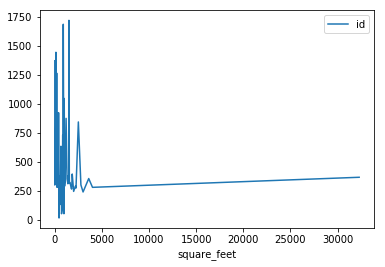

In [62]:
plt.figure()
sqft_grouped.plot(x='square_feet', y='id')#, kind="bar"
plt.show()

In [68]:
master['date'].dtypes

dtype('O')

In [63]:
master.plot(x='date',y='price_y', kind='scatter')

ValueError: scatter requires x column to be numeric

In [60]:
print 'Number of Unique IDs: '
print master.listing_id.unique().shape

Number of Unique IDs: 
(3945,)


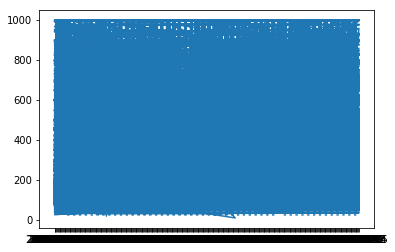

In [51]:
#Attempting to plot date vs price but there are way too many data points... will have to think about this more
plt.plot(master['date'], master['price_y'])
plt.show()

Doing regression now:

In [72]:
#Creating an X and a Y from master:
master_y = master['price_y']

master_x = master.drop(['price_y'], axis=1)

#Dropping non float features from master_x for the time being, will look into keeping some more later on
master_x = master.drop(['price_y'], axis=1)
master_x = master_x.select_dtypes(include=['float64'])

In [73]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(master_x, master_y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

In [74]:
# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

In [75]:
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# MAE calculation
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

In [ ]:
# R2 Score calculation
from sklearn.metrics import r2_score

print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

Old Code: probably won't be needed any longer - just waiting to confirm before removing

In [19]:
def group_mean(x):
    x['mean_price'] = x['price'].mean()
    return x

In [33]:
fr = cal.groupby(calendar.listing_id).apply(group_mean)

In [34]:
fr = fr.loc[fr.available!='f']

In [25]:
#Estimating total revenue for a whole property home.
frame = fr[['listing_id','mean_price']].groupby(['listing_id']).sum()

In [71]:
merged.rename(columns={'mean_price':'estimated_tot_income'}, inplace=True)

In [72]:
merged['estimated_tot_income'] = merged['estimated_tot_income'].apply(lambda x: x*0.75)

In [73]:
cols = ['id','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'estimated_tot_income']

In [75]:
merged[cols].sort_values(['estimated_tot_income'], ascending=False).head(3)

,id,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,estimated_tot_income
4141,13172900,3.0,4.0,7.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,265072.50
2298,13413132,4.0,4.0,4.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,235575.00
2091,13329433,2.0,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Pool,Kitchen,""Free Par...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,233655.75


In [76]:
cal.loc[(cal.listing_id == 6275771) & (cal.available!='t')].count()

listing_id    360
date          360
available     360
price           0
dtype: int64

Merging Selection of Unavailable (lt250 days) Listings with their calendars

In [78]:
new = avail_lt250.merge(cal ,how='inner', left_on='id', right_on='listing_id')

In [79]:
new.sort_values(by='id').head(3)

,id,availability_365,listing_id,date,available,price
776173,6,42,6,2017-06-28,f,NaN
776106,6,42,6,2016-12-21,f,NaN
776107,6,42,6,2016-12-20,f,NaN


In [87]:
new_id6 = new.loc[(new.id == 6)]

Plotting values for this listing id

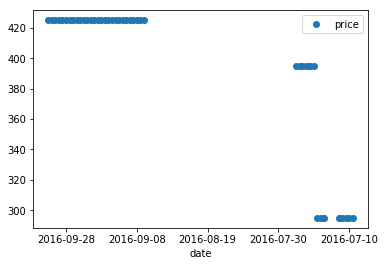

In [88]:
new_id6.plot(x='date', y='price', style='o')
plt.show()

In [90]:
new_id6.loc[(new_id6.price)>0].count()

id                  42
availability_365    42
listing_id          42
date                42
available           42
price               42
dtype: int64

In [ ]:
#Will look for listings that have high occupancy rates but also lots of vacant days in between so we can figure out price patterns